# Naive Bayes

In [ ]:
import pickle
import pandas as pd
import numpy as np
import time
import pickle
from datetime import timedelta  # Import timedelta
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Import dữ liệu
df = pd.read_csv("https://media.githubusercontent.com/media/nhanna1219/Global-Terrorism-OLAP/main/Terrorism.csv", encoding='latin1')
df.head()

,FactID,dYear,dMonth,dDay,dDate,CountryID,CountryName,RegionID,RegionName,City,...,TargetTypeID,TargetType,WeaponTypeID,WeaponType,Kills,Wounds,Success,Suicide,PropertyDamage,GName
0,197000000001,1970,7,2,02/07/1970,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,14,Private Citizens & Property,13,Unknown,1.0,0.0,1,0,0,MANO-D
1,197000000002,1970,1,1,01/01/1970,130,Mexico,1,North America,Mexico city,...,7,Government (Diplomatic),13,Unknown,0.0,0.0,1,0,0,23rd of September Communist League
2,197001000001,1970,1,1,01/01/1970,160,Philippines,5,Southeast Asia,Unknown,...,10,Journalists & Media,13,Unknown,1.0,0.0,1,0,0,Unknown
3,197001000002,1970,1,1,01/01/1970,78,Greece,8,Western Europe,Athens,...,7,Government (Diplomatic),6,Explosives,-1.0,-1.0,1,0,1,Unknown
4,197001000003,1970,1,1,01/01/1970,101,Japan,4,East Asia,Fukouka,...,7,Government (Diplomatic),8,Incendiary,-1.0,-1.0,1,0,1,Unknown


In [ ]:
# Loại bỏ dữ liệu rỗng
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df['Success'] = df['Success'].astype(int)

# Dropping non-relevant columns for simplicity
df_reduced = df[['CountryID', 'AttackTypeID','WeaponTypeID', 'TargetTypeID', 'Success']]

# Tách thuộc tính quyết định ra cột riêng
X = df_reduced.drop('Success', axis=1)
y = df_reduced['Success']

In [ ]:
# Tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the model by Naive Bayes Algorithms
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
start_nv = time.time()
nv_pred = nv.fit (X_train, y_train).predict(X_test)
end_nv = time.time()
times_nv = timedelta(seconds=round(end_nv - start_nv,4)).total_seconds()
print("Time Naive Bayes: ", times_nv)
nv_score = round(accuracy_score(y_test, nv_pred)*100,2 )
accuracy_nv = nv_score
print("Accuracy: ", accuracy_nv)
print("Report: ", classification_report(y_test, nv_pred))

Time Naive Bayes:  0.132
Accuracy:  86.97
Report:                precision    recall  f1-score   support

           0       0.20      0.06      0.09      6024
           1       0.89      0.97      0.93     48227

    accuracy                           0.87     54251
   macro avg       0.54      0.51      0.51     54251
weighted avg       0.81      0.87      0.84     54251



In [ ]:
nv_pred

array([1, 1, 1, ..., 1, 0, 1])

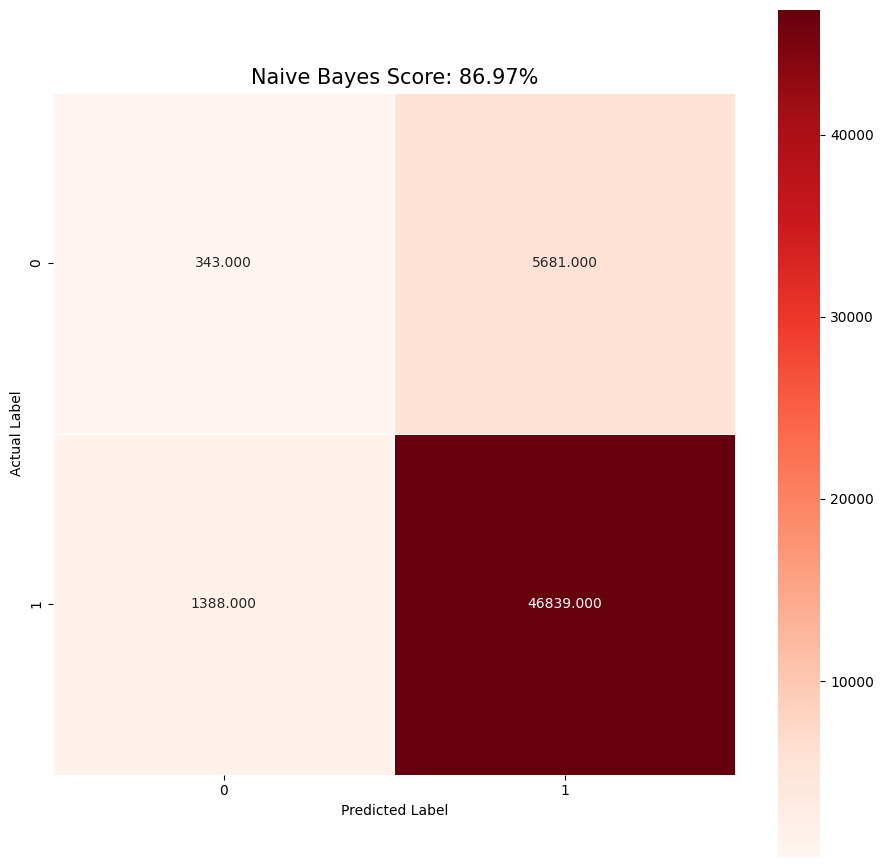

In [ ]:
# Draw the confusion matrix for the Naive Bayes Algorithms
nv_cm = confusion_matrix(y_test, nv_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(nv_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap="Reds")
ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
title = 'Naive Bayes Score: {0}%'.format(nv_score)
plt.title(title, size=15)
plt.show()